In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import RXGate, RZGate

from qiskit_aer import AerSimulator

import numpy as np
import torch

In [2]:
import sys
sys.path.append('../')

In [3]:
from circuits.generate_circuits import GetGHZCircuitsForModel
from models.noise_models import BitPhaseFlipNoise
from simulator.simulate import get_ideal_data_superpos, run_circuit_sampler

In [4]:
NUM_SHOTS = 1024
NUM_QUBITS = 5
HAMMARD_ON = 2
INPUT_STR = '10101'

In [5]:
data = get_ideal_data_superpos(3, 10, 10)

for d in data:
    print(d)

Generating Ideal Data: 100%|██████████| 10/10 [00:00<00:00, 453.18it/s]

(array([[4.3775043, 5.8045053],
       [5.4637775, 4.738514 ],
       [1.9623686, 6.2162786]], dtype=float32), tensor([1, 3, 0, 0, 2, 4, 0, 0], dtype=torch.int32))
(array([[5.8920803, 3.641868 ],
       [3.9764793, 4.19492  ],
       [3.317992 , 5.7643886]], dtype=float32), tensor([0, 0, 0, 0, 2, 0, 8, 0], dtype=torch.int32))
(array([[3.3030164, 4.5092106],
       [5.4205   , 3.6704273],
       [3.223569 , 5.3419485]], dtype=float32), tensor([0, 0, 0, 0, 0, 8, 0, 2], dtype=torch.int32))
(array([[4.016396  , 4.1179366 ],
       [1.0403453 , 5.5975986 ],
       [2.1294804 , 0.10222694]], dtype=float32), tensor([0, 1, 0, 0, 1, 5, 1, 2], dtype=torch.int32))
(array([[1.5911201, 5.964511 ],
       [1.9660548, 4.2799244],
       [5.919841 , 3.515885 ]], dtype=float32), tensor([0, 2, 2, 6, 0, 0, 0, 0], dtype=torch.int32))
(array([[4.2961    , 0.14599594],
       [2.8175542 , 0.78990424],
       [2.651766  , 3.3327203 ]], dtype=float32), tensor([0, 0, 0, 2, 0, 0, 2, 6], dtype=torch.int32))
(arr

In [6]:
noise = BitPhaseFlipNoise()
ghz_circ_gen = GetGHZCircuitsForModel(num_qubits=NUM_QUBITS, hammard_on=HAMMARD_ON, 
                                      noise=noise)

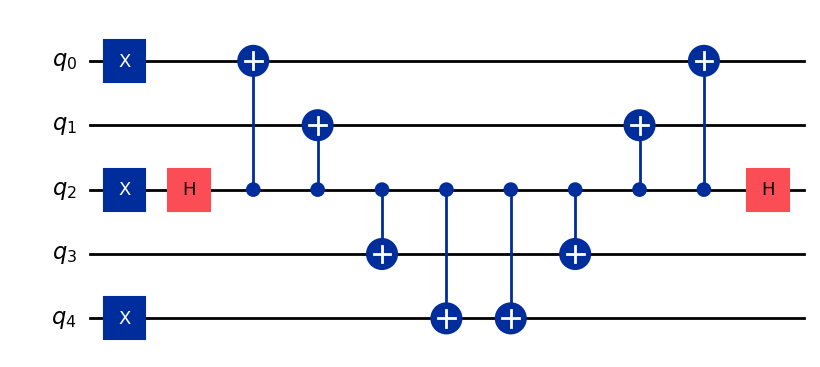

In [7]:
ideal_model_circ = ghz_circ_gen.get_ideal_model_circuit(INPUT_STR)
ideal_model_circ.draw('mpl')

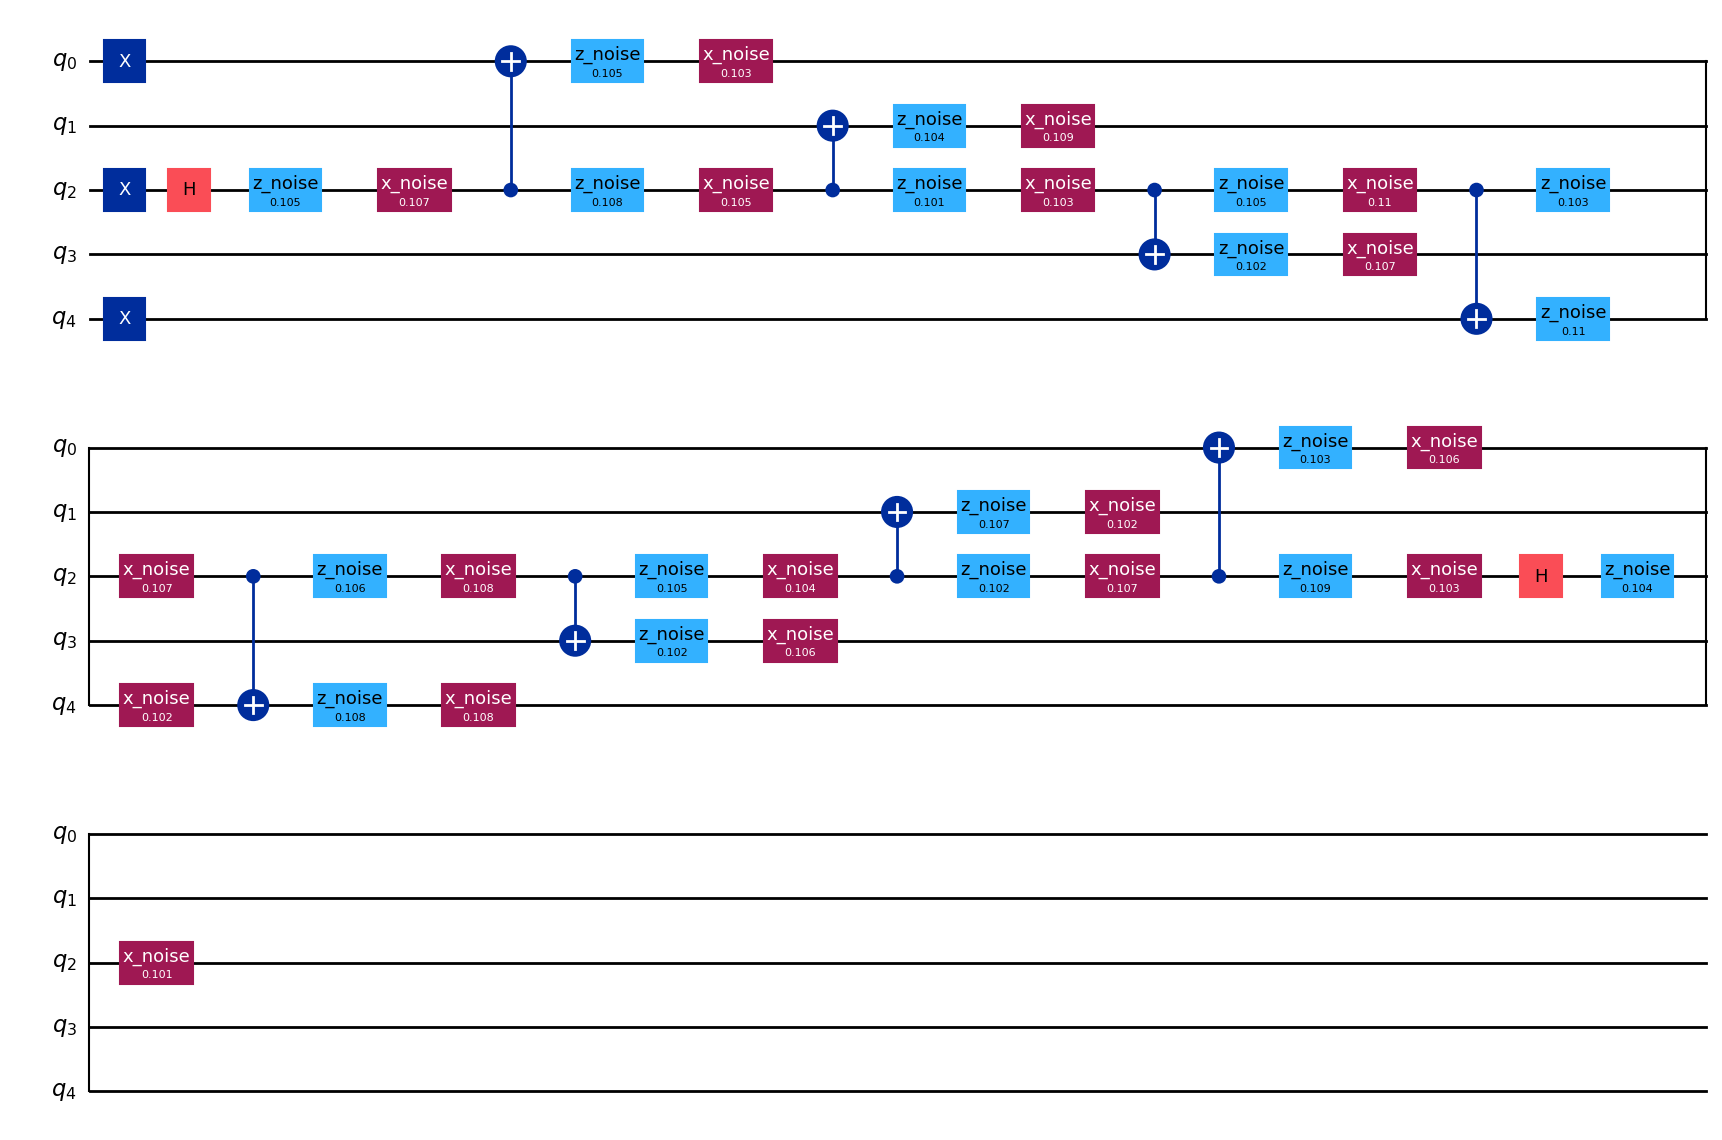

In [8]:
noisy_model_circ = ghz_circ_gen.get_noisy_model_circuit_bitstring(INPUT_STR)
noisy_model_circ.draw('mpl')

In [9]:
ideal_sim = AerSimulator()

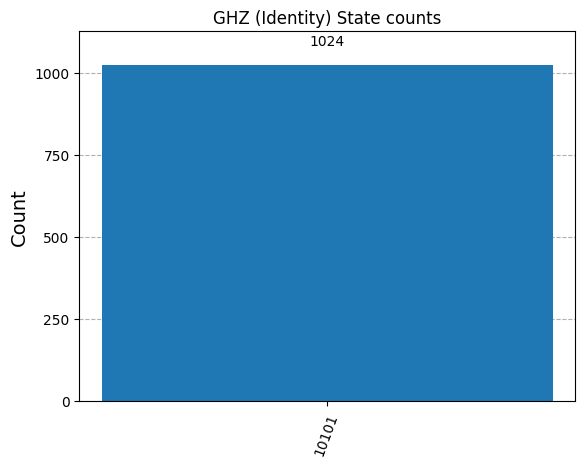

In [10]:
transpiled_circ = transpile(ideal_model_circ.measure_all(inplace=False), ideal_sim)
result = ideal_sim.run(transpiled_circ, shots=NUM_SHOTS).result()
counts = result.get_counts(transpiled_circ)

plot_histogram(counts, title='GHZ (Identity) State counts')

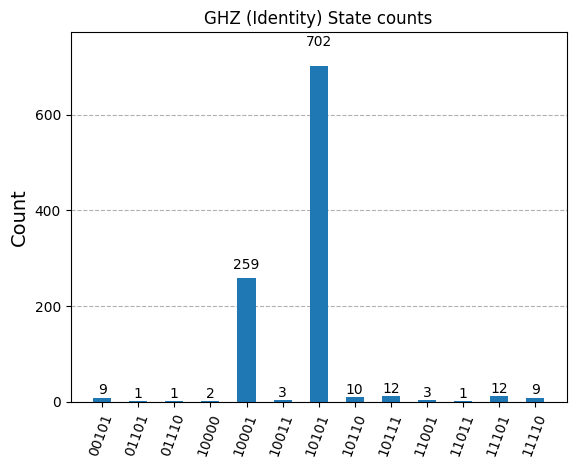

In [11]:
transpiled_circ = transpile(noisy_model_circ.measure_all(inplace=False), ideal_sim)
result = ideal_sim.run(transpiled_circ, shots=NUM_SHOTS).result()
counts = result.get_counts(transpiled_circ)

plot_histogram(counts, title='GHZ (Identity) State counts')

In [12]:
run_circuit_sampler(noisy_model_circ.measure_all(inplace=False))

tensor([  0,   2,   0,   0,   0,   8,   0,   0,   0,   0,   0,   0,   0,   1,
          2,   0,   1, 248,   0,   3,   0, 716,   7,   5,   0,   7,   0,   0,
          1,   7,  16,   0], dtype=torch.int32)